In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fitutils as ft
import scipy.optimize as opt
import fitutils as ft
import tools
import schottky_analysis as sch
import constants as cnt

import linear_acoustic_fit
import nonlinear_acoustic_fit
import nonlinear_optic_fit
import polynomial_optic_fit
import debye_integration as db

### Non linear fit, Debye model

Fitting the data considering the theorical model $\gamma + \beta x + Cs(x) = y(x)$, with $y = C/T$ and $x = T^2$

Between 0 and 12 K : $\beta = 0.9064 mJ/K⁴/mol$ and $\gamma = 10.95 mJ/K²/mol$

Between 0 and 20 K : Unlike the others samples, the fitting seems to be describing a bit better the data. We found $\beta = 0.992 mJ/K⁴/mol$ and $\gamma = 3.92 mJ/mol/K²$. Though, one can notice the probably oversestimated parameter E, with a minimum of the curve shifted to the right. 

Beta, Gamma, n, E :  0.9064517303980083 10.957519739533032 0.0014273750863137411 7.122830378432147e-23


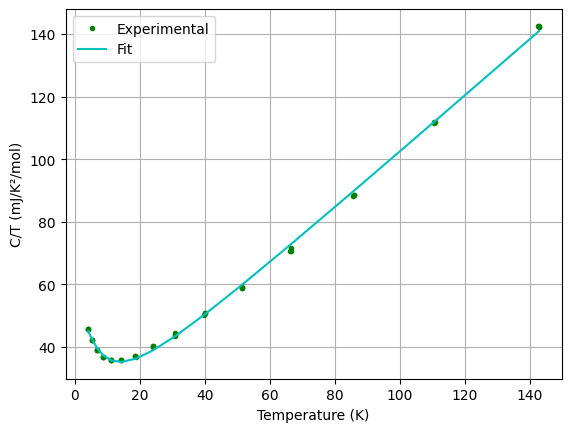

Beta, Gamma, n, E :  0.9895588430195549 3.921420707164871 0.001610304573879326 7.999999999999986e-23


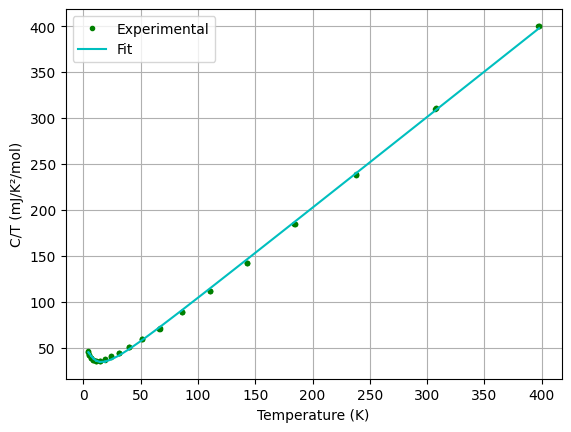

In [9]:
nonlinear_acoustic_fit.plot_fit_acoustic(0, 144, cnt.squared_temperature_P24, cnt.hc_div_temp_P24, cnt.err_hc_div_temp_P24,
                                         bounds=([0.3, 0, 1e-3, 2e-23],[1, 20,5e-2, 8e-23]))

nonlinear_acoustic_fit.plot_fit_acoustic(0, 400, cnt.squared_temperature_P24, cnt.hc_div_temp_P24, cnt.err_hc_div_temp_P24,
                                         bounds=([0.1, 0, 1e-3, 2e-23],[1.2, 20, 1e-1, 8e-23]))

### Linear fit, Debye model

Optimizing the experimental data from 100 $K^2$ to 400 $K^2$, where the curve seems to be linear and the schottky anomaly tend to 0, according to the Debye model : $y(x) = \beta x + \gamma $

The paramters found are close to the ones determined with the non linear fit between 0 and 20 K. We have $\beta = 0.9938 mJ/mol/K⁴$ and $\gamma = 3.09 mJ/mol/K²$

<Figure size 640x480 with 0 Axes>

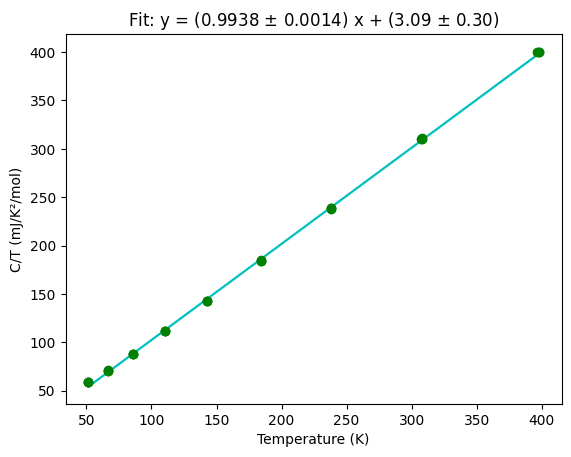

array([9.93795048e-01, 3.09361594e+00, 1.42645689e-03, 2.96086963e-01])

In [12]:
linear_acoustic_fit.linear_fit(50, 400, cnt.squared_temperature_P24, cnt.hc_div_temp_P24, 
                               cnt.err_squared_temperature_P24,cnt.err_hc_div_temp_P24)

### Non linear fit, Debye + Einstein model

Fitting the experimental data to the Debye model with a quadratic contribution in temperature, simulating possible optical modes. Optimizong the paramters of the numercial model $y(x) = \beta x + \gamma + \alpha x^2 + Cs(x)$

Between 0 and 20 K :

$\beta = 0.9097 mJ/K^4/mol$, et $\gamma = 9.32 mJ/mol/K^2$

The optimization which presents the best agreement with the data, so far

Beta, Gamma, n, E, nu :  0.9097931996368498 9.32181100348762 0.0014672224495255563 7.594922526151023e-23 0.00019390779773132227


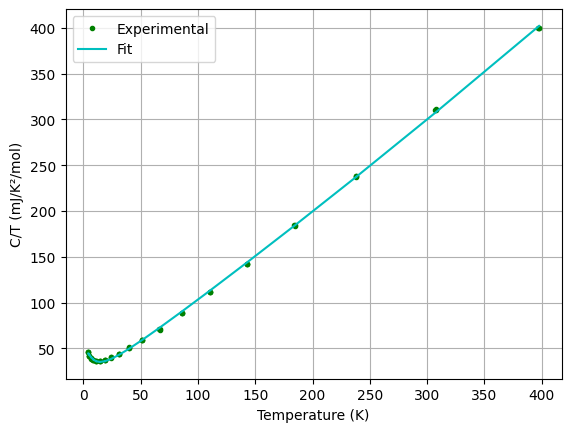

In [13]:
nonlinear_optic_fit.plot_fit_optic(0, 400, cnt.squared_temperature_P24, cnt.hc_div_temp_P24, cnt.err_hc_div_temp_P24, 
                                   bounds = ([0.2, 0, 1e-5, 5e-23, 0],[1, 10, 5e-2, 7.9e-23, 1]))

Alpha, Beta, Gamma :  0.000293757521919793 0.7648187158684073 0.40638033415610697


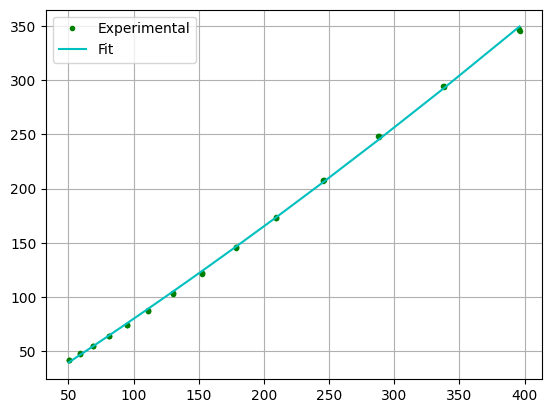

In [15]:
polynomial_optic_fit.plot_fit_quadra(50, 400, cnt.squared_temperature_ISIS, cnt.hc_div_temp_ISIS, 
                                     bounds = ([0, 0, 0],[1, 1, 20]))